## **Лабораторная работа 1**

### Задание 1

Проделать все представленные вычисления используя другой набор данных - файл **births.csv**

Следующие задания смотрите по тексту работы

_____________

Импортируем базовый набор библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загружаем данные  и выводим первые 5 строк

In [2]:
passengers = pd.read_csv("passengers.csv")
passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Делаем поле даты индексным и снова выводим первые 5 строе для контроля результата

In [3]:
passengers.set_index('Month', inplace = True)
passengers.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


Преобразуем наше индексное поле в правильный формат datetime 

In [4]:
passengers.index = pd.to_datetime(passengers.index)

In [5]:
passengers.index[:5]

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

**Обратите внимание** - можно все сделать сразу в момент загрузки 

    passengers = pd.read_csv('passengers.csv', index_col = 'Month', parse_dates = True

в качестве примера преобразования данных выведем 5 строк средних данных за год

In [6]:
passengers.resample(rule = 'AS').mean().head()

,#Passengers
Month,
1949-01-01,126.666667
1950-01-01,139.666667
1951-01-01,170.166667
1952-01-01,197.000000
1953-01-01,225.000000


теперь посмотрим как в Pandas  реализовано скользыщее среднее.

In [7]:
passengers.rolling(window = 3).mean().head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333


Базовый вариант отрисовки данных с помощью Pandas

<Axes: xlabel='Month'>

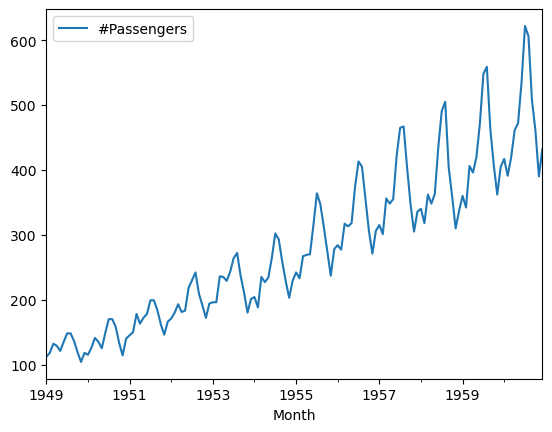

In [8]:
passengers.plot()

А теперь тоже самое но в расширенном варианте 

[Text(0.5, 1.0, 'Перевозки пассажиров с 1949 по 1960 год'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество пассажиров')]

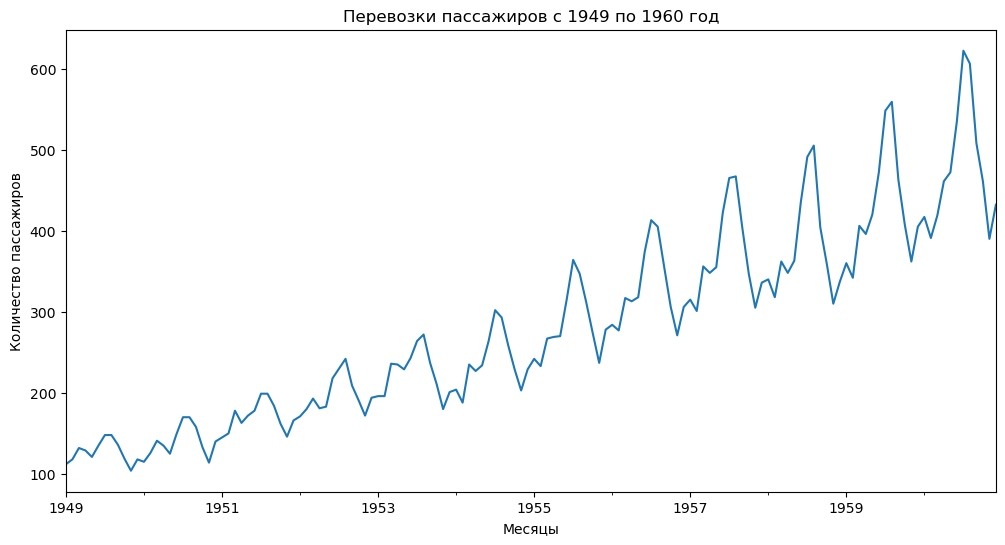

In [9]:
ax = passengers.plot(figsize = (12,6), legend = None)
ax.set(title = 'Перевозки пассажиров с 1949 по 1960 год', xlabel = 'Месяцы', ylabel = 'Количество пассажиров')

________________
### Задание 2

Написать собственную функцию на языке Python вычисляющую экспотенциальное скользящее среднее и отрисовать ее на графике данных
с использованием Matplotlib. Сравнить с простым слоьзящим средним , сделать письменный вывод
_______________

Код ниже демонстрирует отрисовку данных а также 2 вариантов скользящего среднего используя Matplotlib

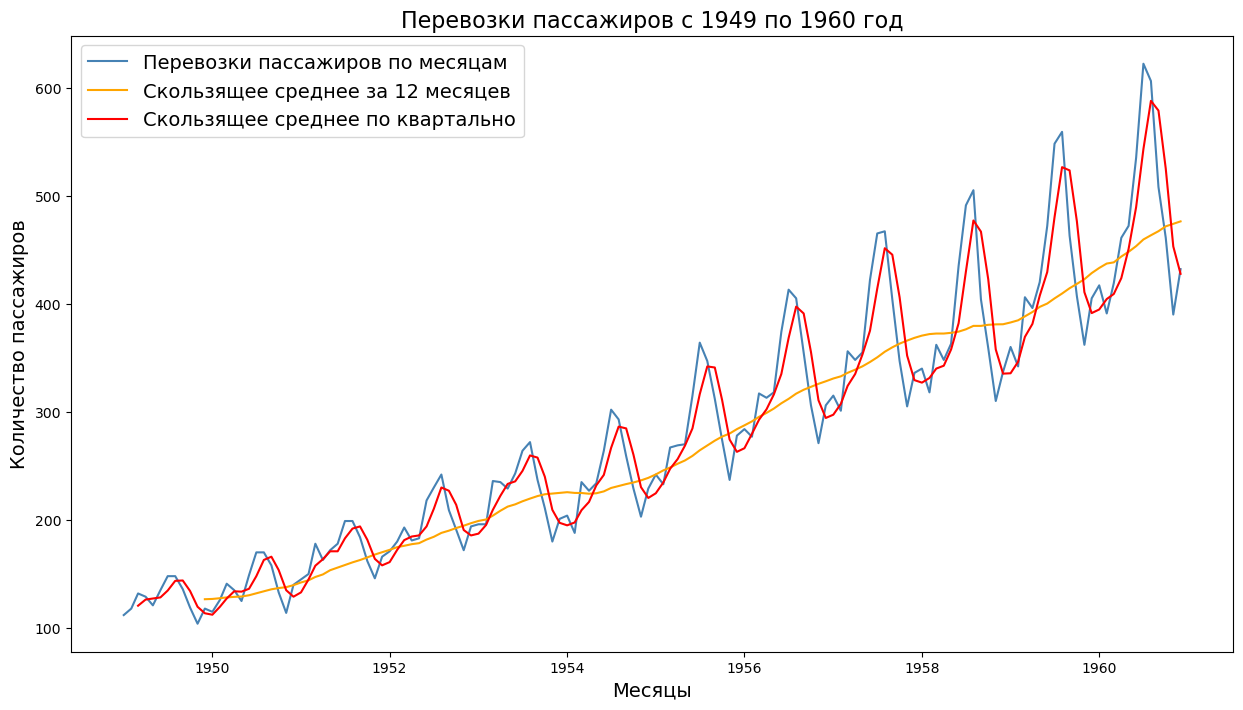

In [10]:
plt.figure(figsize = (15,8))
 
plt.plot(passengers, label = 'Перевозки пассажиров по месяцам', color = 'steelblue')
plt.plot(passengers.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
plt.plot(passengers.rolling(window = 3).mean(), label = 'Скользящее среднее по квартально', color = 'red')

plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров с 1949 по 1960 год', fontsize = 16)
 
plt.show()

Импортируем библиотеку statsmodels для статистического анализа временного ряда

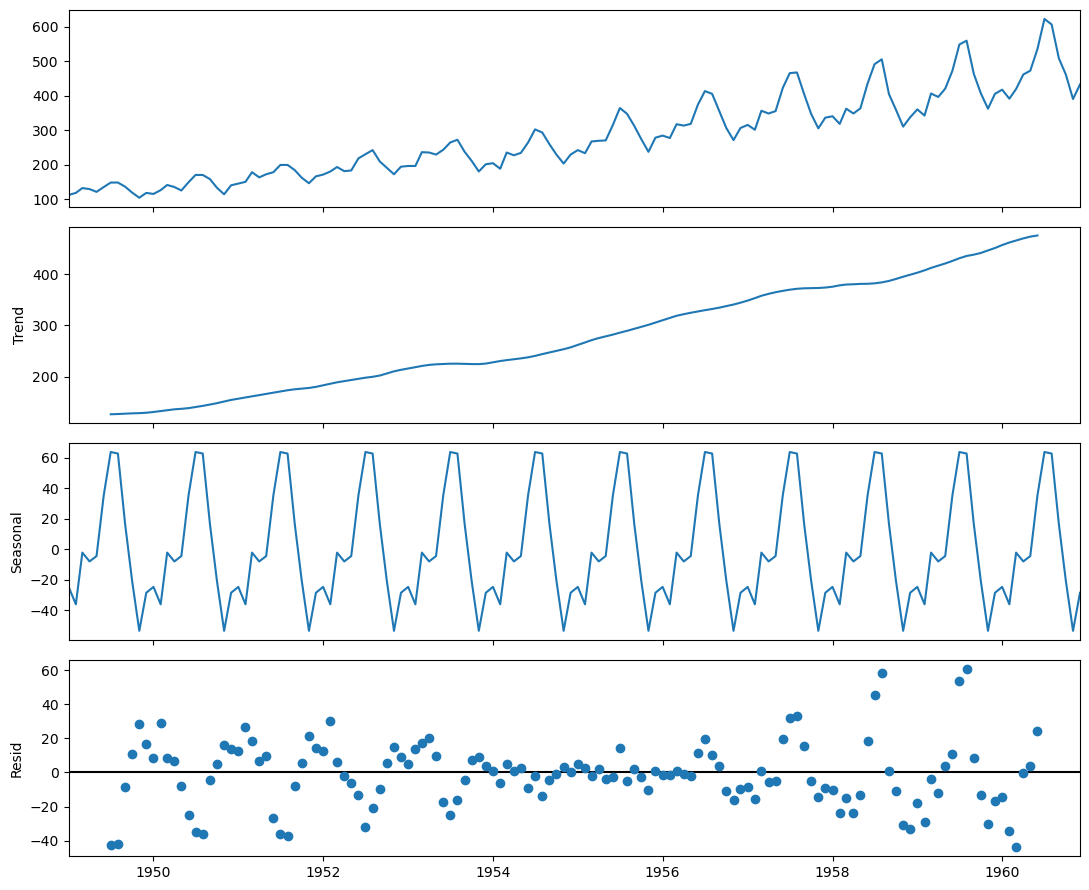

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
 
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
decompose = seasonal_decompose(passengers)
decompose.plot()
 
plt.show()

Проведем тест Дика-Фуллера

In [12]:
from statsmodels.tsa.stattools import adfuller
 
adf_test = adfuller(passengers['#Passengers'])
 
print('p-value = ' + str(adf_test[1]))

p-value = 0.991880243437641


______________________
### Задание 3

Сделать письменный вывод о временном ряде в новом датасете на основе проведенного анализа

**Внимание!** Ваша работа должна содержать работу только с новым набором данных
_________________________
